# Viewing Trained Model Predictions

In [ ]:
# !rm -rf test-images
# !rm -rf art-classifier-model
# !rm -rf art-classifier-model.zip
# !mkdir -p test-images
# !wget -c 'https://github.com/todgru/art-classifier-ml-model/blob/main/art-classifier-model.zip?raw=true' -O art-classifier-model.zip
# !unzip art-classifier-model.zip -d art-classifier-model

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox, VBox, interactive_output
import io
from PIL import Image

In [2]:
# Load Keras model
# model = tf.keras.models.load_model("/content/art-classifier-model/art-classification-multi-class-mobilenet-v3-large-sigmoid-0.1dropout-softmax")
model = tf.keras.models.load_model("./art-classifier-model/art-classification-multi-class-mobilenet-v3-large-sigmoid-0.1dropout-softmax")

# Display model architecture summary
# model.summary()

Metal device set to: Apple M1


2022-01-22 21:37:42.457746: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-22 21:37:42.457933: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
# constants and variables

class_names = ('Abstract Art', 'Abstract Expressionism', 'Cubism', 'Expressionism', 'Naïve Art (Primitivism)', 'Op Art', 'Pop Art', 'Street art', 'Suprematism', 'Surrealism')
pixels = 224
image_path = './test-images'
test_image_urls = [
    ("abstract_expressionism_1.jpg", "https://uploads2.wikiart.org/images/jock-macdonald/from-a-riviera-window-1955.jpg", "Jock Macdonald"),
    ("abstract_neoplasticim_1.jpg", "https://uploads7.wikiart.org/images/theo-van-doesburg/simultaneous-counter-composition-1930.jpg", "Theo Van Doesburg"),
    ("abstract_expressionism_2", "https://uploads3.wikiart.org/images/kazuo-nakamura/inner-view-3-1955.jpg!Large.jpg","Kazuo Nakamura"),
    ("expresionism.jpg", "https://uploads7.wikiart.org/00151/images/albin-egger-lienz/ael-der-portraetmaler-auf-dem-lande.jpg!Large.jpg","Albin Egger Lienz"),
    ("naive-primitism.jpg", "https://uploads3.wikiart.org/images/niko-pirosmani/fisherman-among-rocks-1906.jpg!Large.jpg", "Niko Pirosmani"),
    ("surrealism.jpg","https://uploads0.wikiart.org/images/max-ernst/at-the-first-clear-word-1923.jpg!Large.jpg","Max Ernst"),
    ("op_art_medium_1.jpg", "http://www.biddingtons.com/os/item_images/100005_egrichardallen.jpg", "Richard Allen"),
    ("paris_street_art_1.jpg", "http://www.missionmission.org/wp-content/uploads/2009/03/paris-street-art.jpg", "Unknown"),
    ("street_art_1.jpg", "https://s.inyourpocket.com/gallery/148449m.jpg", "Unknown"),
    ("graffiti_1.jpg", "https://s3.amazonaws.com/content.fatcap.com/opct_7be7040d3181da960d43eabeaf031b8b8ff35e67.jpg", "Unknown"),
    ("graffiti_3.jpg", "https://www.logolynx.com/images/logolynx/a6/a6c396af9888ffba089b6ef4ae18e4c6.jpeg", "Uknown"),
    ("sunflower_picture_1.jpg", "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg", "Google Image Data"),
]


In [4]:

def get_predictions(img_array):
    [rank] = model.predict(img_array)
    preds = zip(list(class_names), list(rank))
    score = list(sorted(list(preds), key = lambda z: z[1], reverse = True)[:len(class_names)])

    return score

def format_predictions(score, artist):
    first = score[0]
    second = score[1]
    third = score[2]
    return """
{} {:.0f}%
{} {:.0f}% 
{} {:.0f}%
Artist: {}""".format(    
        first[0], 100 * first[1], 
        second[0],100*second[1], 
        third[0],100*third[1],
        artist)

  

In [9]:
import secrets

# Display demo image predictions
def display_demo_predictions():
    index = secrets.randbelow(12)
    print(index)
    name, url, artist = test_image_urls[index]
   
    image_path = tf.keras.utils.get_file(name, origin=url)
    img = tf.keras.utils.load_img(image_path, target_size=(pixels, pixels))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    img_array = img_array / 255
 
    score = get_predictions(img_array)
#     image_predictions.append(score)
#     image_titles.append(format_predictions(score, artist))

    print(format_predictions(score, artist))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1

Suprematism 98%
Pop Art 1% 
Abstract Art 1%
Artist: Theo Van Doesburg


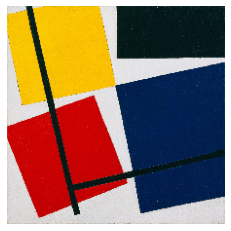

In [10]:
display_demo_predictions()

In [11]:

out = widgets.Output(layout={'border': '1px solid black'})
uploader = widgets.FileUpload(accept='image/jpeg', multiple=False)

@out.capture(clear_output=True)
def display_image():

    first_image_filename = (list(uploader.value.keys())[0])
    image_file_data = uploader.value[first_image_filename]["content"]
    image = Image.open(io.BytesIO(image_file_data))

    # Model expects specific model dimensions 
    size = (pixels,pixels)
    resized_image = image.resize(size)

    img_array = tf.keras.utils.img_to_array(resized_image)
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    img_array = img_array / 255 # normalize floats between 0 and 1

    [rank] = model.predict(img_array)
    preds = zip(list(class_names), list(rank))
    score = list(sorted(list(preds), key = lambda z: z[1], reverse = True)[:len(class_names)])
    
    formatted_prediction_title = format_predictions(score,first_image_filename)
    print(formatted_prediction_title)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

    return

def on_file_uploaded(change):
    display_image()
    uploader._counter=0
#     display(out)

# upload image file
uploader.observe(on_file_uploaded, 'value')
# display(uploader)


In [12]:
# out
display(
    VBox([uploader,out])
)